# Redshift Data of DESIJ0132-1600

Author: Anowar Shajib, S M Rafee Adnan

## Load data

In [1]:
!pip install astropy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.7/738.7 kB 33.7 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
from astropy.io import fits
from astropy.wcs import WCS

In [3]:
data, header = fits.getdata("/kaggle/input/fits-file/DESIJ0132-1600_F140W_drz_sci.fits", header=True)

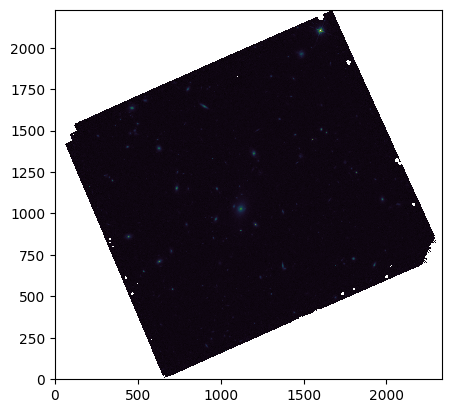

In [4]:
plt.imshow(np.log10(data), origin="lower", cmap="cubehelix", interpolation="nearest")

In [5]:
FILENAME = "/kaggle/input/redshift-data-desij0132-1600/redshift_DESIJ0132-1600.csv"  # need to be changed for each cluster file
data_legacy = pd.read_csv(FILENAME, delimiter=",")
data_legacy

,_r,id,RAJ2000,DEJ2000,release,brickid,objid,type,pstar,gmmcomp,zphot,e_zphot,fclean,fqual
0,0.011988,8000239432003547,23.017958,-16.015812,8000,239432,3547,PSF,0.036,P9,1.424,0.615,1,0
1,0.013121,8000239432003549,23.017528,-16.016983,8000,239432,3549,REX,0.001,R5,0.935,0.186,1,1
2,0.012523,8000239432003579,23.011505,-16.015388,8000,239432,3579,PSF,0.863,P2,0.455,0.333,1,0
3,0.010241,8000239432003620,23.009844,-16.011755,8000,239432,3620,EXP,0.002,E7,0.568,0.110,1,1
4,0.009941,8000239432003621,23.012988,-16.013180,8000,239432,3621,REX,0.002,R7,1.025,0.132,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0.011044,8000239432004292,23.009684,-15.995119,8000,239432,4292,PSF,0.000,P0,1.127,0.672,1,0
75,0.009331,8000239432004293,23.016536,-15.994558,8000,239432,4293,PSF,0.996,P2,0.922,0.575,1,0
76,0.012725,8000239432004315,23.008194,-15.994112,8000,239432,4315,REX,0.123,R4,0.508,0.078,1,1
77,0.010801,8000239432004336,23.013473,-15.993533,8000,239432,4336,REX,0.002,R8,1.103,0.093,1,1


In [6]:
%matplotlib widget
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    data_legacy["RAJ2000"], data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = data_legacy["objid"][i]  # Accessing the 'objid' column from your DataFrame
    plt.annotate(
        f"{obj_id}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

Canvas(toolbar=None)

In [7]:
# In degrees
center_x, center_y = 23.0166667, -16.0038889  # RA 01:32:04 DEC -16:00:14
radii = 60

# in arcsec
radii_deg = radii / 3600

x_upper, y_upper = center_x + radii_deg, center_y + radii_deg
x_lower, y_lower = center_x - radii_deg, center_y - radii_deg

x_limit_upper, y_limit_upper = wcs.all_world2pix(x_upper, y_upper, 0)
x_limit_lower, y_limit_lower = wcs.all_world2pix(x_lower, y_lower, 0)

print(x_limit_upper, x_limit_lower)

358.17692772747375 1800.0562460605574


In [8]:
data_legacy_cropped = data_legacy[(data_legacy["RAJ2000"] < x_upper) & (data_legacy["RAJ2000"] > x_lower) & (data_legacy["DEJ2000"] < y_upper) & (data_legacy["DEJ2000"] > y_lower)]


In [9]:
data_legacy.sort_values(by="objid")

# central deflector
central_deflector_id = 3828
object_ids = [central_deflector_id,
              3832, 3834, 3833, 3829, 3831, 3830, 3836, 3815]  

columns_to_drop = [
    "id",
    "release",
    "brickid",
    "fclean",
    "fqual"
]  # List of column names to drop
data_legacy_dropped = data_legacy.drop(columns=columns_to_drop)

selected_data_legacy = data_legacy_dropped[
    data_legacy_dropped["objid"].isin(object_ids)
]
selected_data_legacy.set_index("objid", inplace=True)

print(selected_data_legacy)

             _r    RAJ2000    DEJ2000 type  pstar gmmcomp  zphot  e_zphot
objid                                                                    
3828   0.000908  23.015735 -16.004042  DEV  0.038      D1  0.359    0.040
3829   0.003644  23.013675 -16.006127  REX  0.003      R4  0.451    0.060
3830   0.003438  23.019052 -16.001328  REX  0.004      R4  0.486    0.050
3831   0.003170  23.015742 -16.006932  REX  0.001      R4  0.536    0.058
3832   0.000191  23.016709 -16.003702  REX  0.000      R7  1.144    0.333
3833   0.002085  23.015590 -16.002080  REX  0.001      R6  0.837    0.081
3834   0.001353  23.016302 -16.002582  PSF  0.002      P7  0.611    0.319
3836   0.002761  23.018631 -16.001875  REX  0.000      R5  1.213    0.242


In [10]:
zphot_deflector = selected_data_legacy.loc[central_deflector_id, "zphot"]
del_z = 0.03 * (1 + zphot_deflector)
print("zphot_deflector:", zphot_deflector)
print("del_z:", del_z)
data_legacy_cropped_dropped = data_legacy_cropped.drop(columns=columns_to_drop)
data_legacy_cropped_dropped.set_index("objid", inplace=True)
# selected_data_legacy.set_index("objid", inplace=True)

not_neighbour_data_legacy = data_legacy_cropped_dropped[
    (data_legacy_cropped_dropped["zphot"] <= zphot_deflector - del_z) |
    (data_legacy_cropped_dropped["zphot"] >= zphot_deflector + del_z)
]

print(not_neighbour_data_legacy)

zphot_deflector: 0.359
del_z: 0.04077
             _r    RAJ2000    DEJ2000 type  pstar gmmcomp  zphot  e_zphot
objid                                                                    
3547   0.011988  23.017958 -16.015812  PSF  0.036      P9  1.424    0.615
3549   0.013121  23.017528 -16.016983  REX  0.001      R5  0.935    0.186
3579   0.012523  23.011505 -16.015388  PSF  0.863      P2  0.455    0.333
3620   0.010241  23.009844 -16.011755  EXP  0.002      E7  0.568    0.110
3621   0.009941  23.012988 -16.013180  REX  0.002      R7  1.025    0.132
...         ...        ...        ...  ...    ...     ...    ...      ...
4292   0.011044  23.009684 -15.995119  PSF  0.000      P0  1.127    0.672
4293   0.009331  23.016536 -15.994558  PSF  0.996      P2  0.922    0.575
4315   0.012725  23.008194 -15.994112  REX  0.123      R4  0.508    0.078
4336   0.010801  23.013473 -15.993533  REX  0.002      R8  1.103    0.093
4376   0.013335  23.010347 -15.992018  REX  0.003      R0  0.952    0.148


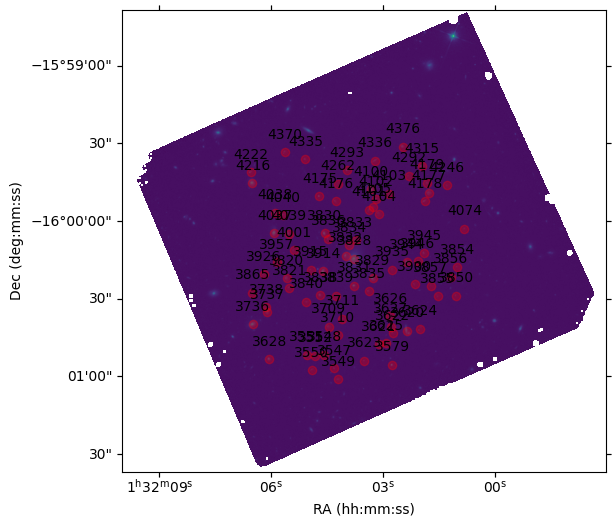

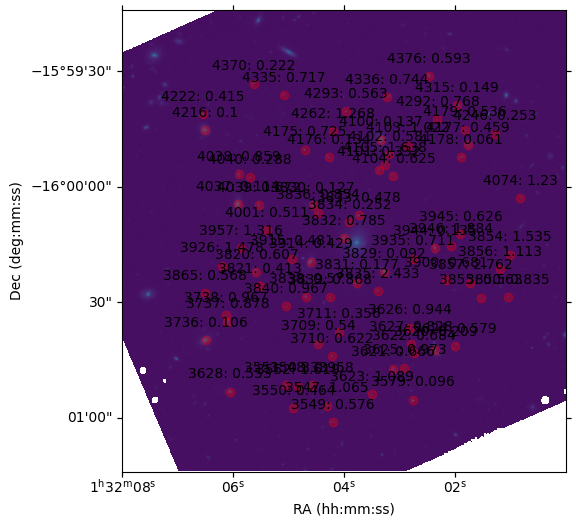

In [11]:
%matplotlib inline
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    not_neighbour_data_legacy["RAJ2000"], not_neighbour_data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.3
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = not_neighbour_data_legacy.index[i]  # Accessing the 'objid' column from your DataFrame
    zphot = not_neighbour_data_legacy.iloc[i]["zphot"]  
    plt.annotate(
        f"{obj_id}: {round(zphot - zphot_deflector, 3)}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
    )

ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)

ax.invert_xaxis()
# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

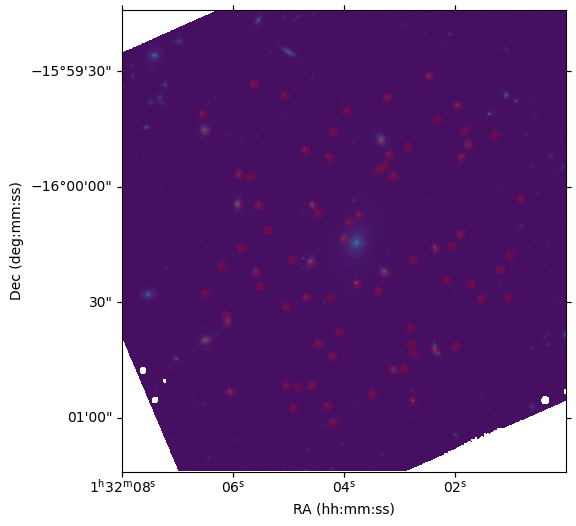

In [12]:
%matplotlib inline
wcs = WCS(header)

# Create a figure with WCS axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection=wcs)

# Plot the image
# norm = imshow_norm(data, origin='lower')
im = ax.imshow(np.log10(data), cmap="viridis")

x_scatter, y_scatter = wcs.all_world2pix(
    not_neighbour_data_legacy["RAJ2000"], not_neighbour_data_legacy["DEJ2000"], 0
)

# Plot scatter points
ax.scatter(
    x_scatter, y_scatter, color="red", marker="o", label="J2000 RA/Dec", alpha=0.15
)

# write id numbers beside the objects

for i, (x, y) in enumerate(zip(x_scatter, y_scatter)):
    obj_id = not_neighbour_data_legacy.index[i]  # Accessing the 'objid' column from your DataFrame
    zphot = not_neighbour_data_legacy.iloc[i]["zphot"]  
#     plt.annotate(
#         f"{obj_id}: {round(zphot - zphot_deflector, 3)}", (x, y), textcoords="offset points", xytext=(0, 10), ha="center"
#     )

ax.set_xlim(x_limit_lower, x_limit_upper)
ax.set_ylim(y_limit_lower, y_limit_upper)

ax.invert_xaxis()
# Add labels
ax.set_xlabel("RA (hh:mm:ss)")
ax.set_ylabel("Dec (deg:mm:ss)")

plt.show()

## Save the Redshift data to the YAML file